In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv');
df['fossil_consumption'] = df['fossil_fuel_consumption']
df['biofuel_energy_per_capita'] = df['biofuel_cons_per_capita']

stat_suffix = ['consumption', 'share_energy', 'electricity']
stat_unit = ['terawatt-hours','percentage','terawatt-hours']
fuel = ['biofuel','coal','gas','hydro','nuclear','oil', 'solar','wind']

In [16]:
normalize = False # @param
selected_stat = stat_suffix[2] # @param
selected_unit = stat_unit[stat_suffix.index(selected_stat)]
selected_year = 2019 # @param
countries = "South Korea,United States Virgin Islands,Indonesia,Italy,Thailand,French Guiana,United Kingdom,Taiwan" # @param
country_list = countries.split(",")

In [17]:
stats = ["_".join(items) for items in itertools.product(fuel, [selected_stat])]
keep_cols = ['year', 'gdp','country']+stats
df2 = pd.concat([df[['country','year', 'gdp']], df.filter(items=stats)], axis=1)[df['year']> 1990]

print(country_list)
df_sel = df2[df2['country'].isin(country_list)]
df_sel['country'].unique()

['South Korea', 'United States Virgin Islands', 'Indonesia', 'Italy', 'Thailand', 'French Guiana', 'United Kingdom', 'Taiwan']


array(['French Guiana', 'Indonesia', 'Italy', 'South Korea', 'Taiwan',
       'Thailand', 'United Kingdom', 'United States Virgin Islands'],
      dtype=object)

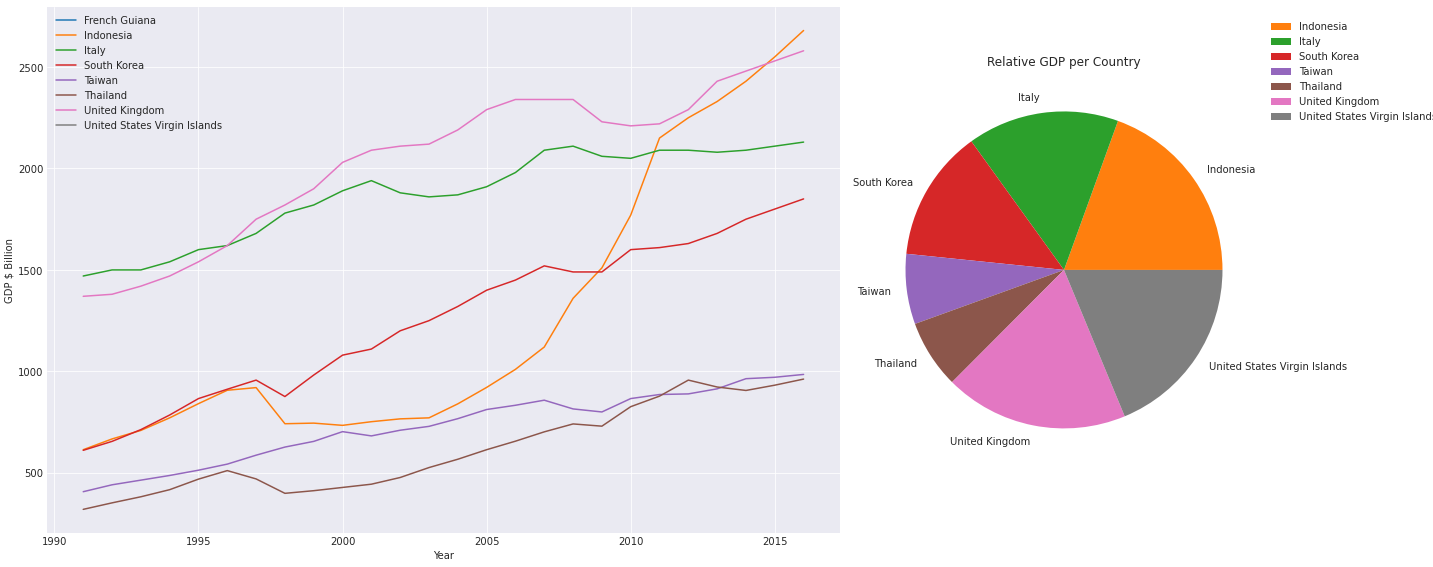

In [18]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(1,2, figsize=(20,8), gridspec_kw={'width_ratios': [2, 1]})
    df_gdp = df_sel[['country', 'year','gdp']]
    df_gdp['gdp'] = df_gdp['gdp'] / 1e9;
    df_gdp_c = df_gdp.groupby('country')

    df_gdp_c.plot(kind="line", x='year', ax=ax[0]);

    ax[0].legend(df_gdp_c.groups.keys())
    ax[1].set_title('Country GDP Since 1990 ($ Billion)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('GDP $ Billion')

    df_sel['gdp'] = df_sel['gdp'].ffill();
    df_sel[df_sel['year'] == selected_year][['country','gdp']].set_index('country').plot(kind="pie", y='gdp', ax=ax[1]).legend(loc='center left',bbox_to_anchor=(1.0, 1.0));
    ax[1].set_ylabel('')
    ax[1].set_title('Relative GDP per Country')
    plt.tight_layout()

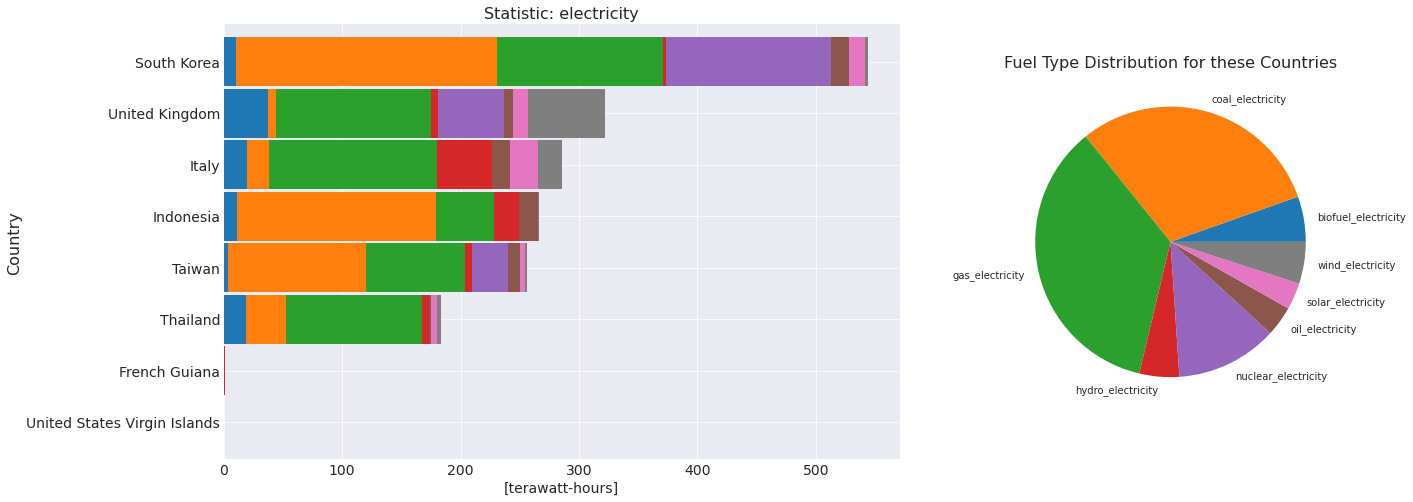

In [19]:
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(1,2,figsize=(20,8), gridspec_kw={'width_ratios': [2, 1]})
    df_p = df_sel[(df_sel['year'] == selected_year)][['country']+stats]
    df_p = df_p.set_index('country')

    if normalize:
        df_p = 100*df_p.div(df_p.sum(axis=1), axis=0)

    s = df_p.sum(axis=1).sort_values(ascending=True)
    df_p = df_p.reindex(s.index)
    df_p.plot(kind="barh", ax=ax[0], stacked=True, width=0.95, legend=False);
    ax[0].set_title('Statistic: ' + selected_stat,fontsize=16);
    ax[0].set_ylabel('Country',fontsize=16);
    ax[0].set_xlabel("[percentage]" if normalize else f"[{selected_unit}]",fontsize=14);    
    for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
        label.set_fontsize(14)

    df_p.sum().plot(kind="pie", ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_title('Fuel Type Distribution for these Countries', fontsize=16)    

In [6]:
df_p

,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,solar_electricity,wind_electricity
country,,,,,,,,
Spain,5.570,12.860,83.710,24.650,58.350,14.980,15.100,55.650
Iran,0.024,0.597,190.321,30.071,5.866,78.776,0.244,0.398
France,8.640,3.640,39.310,56.910,399.010,10.550,12.230,34.720
Japan,41.290,278.036,308.903,79.820,65.682,74.225,74.522,8.534
Russia,3.313,170.046,484.930,192.432,195.535,10.493,0.985,0.315
India,14.680,998.538,47.980,161.741,45.163,0.108,46.273,63.308
China,111.758,4553.800,232.500,1302.100,348.700,148.442,224.000,405.300
